## Exercise 1
Tasks:
- Cluster the types of crimes based on the success of the police in facing/solving them.
- Cluster the types of crimes and explain what each cluster represents.
- Identify outliers in crime types and explain what they represent/why they are outliers.
- Try to predict the super-category (e.g. ΕΠΙΚΡΑΤΕΙΑ/ΚΛΟΠΕΣ-ΔΙΑΡΡΗΞΕΙΣ, ...) of a record given
only its numeric fields (τελ/να, απόπειρες, εξιχνιάσεις, ημεδαποί, αλλοδαποί), providing an explanation
of the main factors for the decision and report the performance on a cross-validation evaluation.


### Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
FILE_NAME = "2016_epikrateia.xlsx"

# load the first two sheets
dfs = pd.read_excel(FILE_NAME, sheet_name=[0, 1])
data_df = dfs[0]  # type: pd.DataFrame
superclass_df = dfs[1]  # type: pd.DataFrame

data_df.head()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95
1,ΑΠΑΤΕΣ,3790,1189,2066,994,247
2,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22
3,ΒΙΑΣΜΟΙ,155,82,164,102,91
4,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55


In [31]:
data_df.tail()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
37,Ληστείες σε πρακτορεία ΟΠΑΠ,31,5,3,3,5
38,Ληστείες σούπερ μάρκετ,127,2,50,24,10
39,Ληστείες ταχυδρομικών διανομέων,4,3,1,2,0
40,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",14,2,12,8,0
41,Ληστείες χρηματαποστολών,21,2,1,3,0


In [32]:
superclass_df.head()

,ΟΝΟΜΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ,34805,1483,25964,21089,9573
1,ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ,75083,5469,14798,9990,3961
2,ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ,26180,720,8543,1405,451
3,ΛΗΣΤΕΙΕΣ,4738,325,1582,1295,618


For the first task we have to cluster the types of crimes based on the success of the police in facing/solving them.

In order to achieve this, we have to keep the columns "τελ/να" and "απόπειρες".
The type of clustering that was chosen is Hierarchical clustering since we have few data, and we do not know the number
of clusters beforehand.

However, the decision of the number of clusters that can best depict different groups can be
chosen by observing the dendrogram.
The best choice of the number of clusters is the no. of vertical lines in the dendrogram cut by a
horizontal line that can transverse the maximum distance vertically without intersecting a
cluster.

For k- means clustering we would need to have prior knowledge about the clusters.

In [33]:
task_1_df = data_df[["τελ/να", "εξιχνιάσεις"]]

We have to normalize the data so that the scale of each variable is the same. Why is this important?

If the scale of the variables is not the same, the model might become biased towards
the variables with a higher magnitude like ΑΠΑΤΕΣ or ΕΠΑΙΤΕΙΑ.

In [34]:
from sklearn.preprocessing import normalize
data_scaled = normalize(task_1_df)
data_scaled = pd.DataFrame(data_scaled, columns=task_1_df.columns)
data_scaled.head()

,τελ/να,εξιχνιάσεις
0,0.404747,0.914429
1,0.878019,0.478625
2,0.665163,0.746699
3,0.686884,0.726767
4,0.834894,0.550411


The x-axis contains the samples and y-axis represents the distance between these samples.
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1 and cut the dendrogram


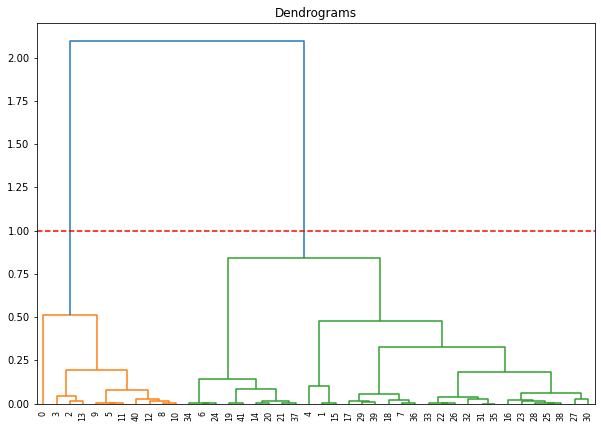

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points.
Let’s now apply hierarchical clustering for 2 clusters


In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int32)

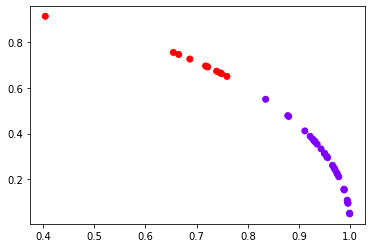

In [37]:
plt.scatter(data_scaled["τελ/να"], data_scaled["εξιχνιάσεις"], c=cluster.labels_, cmap='rainbow')

In [38]:
# Map crime names to their cluster.
crimes_names = data_df["ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"].tolist()
clusters = dict(zip(crimes_names, cluster.labels_))
from pprint import pprint
pprint(clusters)

{'ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ': 1,
 'ΑΠΑΤΕΣ': 0,
 'ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ': 1,
 'ΒΙΑΣΜΟΙ': 1,
 'ΕΚΒΙΑΣΕΙΣ': 0,
 'ΕΠΑΙΤΕΙΑ': 1,
 'ΖΩΟΚΛΟΠΗ': 0,
 'ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ': 0,
 'Κλοπές - Διαρρήξεις από ιχε αυτ/τα': 0,
 'Κλοπές - Διαρρήξεις ιερών ναών': 0,
 'Κλοπές - Διαρρήξεις καταστημάτων': 0,
 'Κλοπές - Διαρρήξεις λοιπές': 0,
 'Κλοπές - Διαρρήξεις οικιών': 0,
 'Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα': 0,
 'Κλοπές Τροχοφόρων ΙΧΕ αυτ/των': 0,
 'Κλοπές Τροχοφόρων ΙΧΦ-Λεωφορείων': 0,
 'Κλοπές Τροχοφόρων Λοιπών οχημάτων': 0,
 'Κλοπές Τροχοφόρων Μοτοποδηλάτων': 0,
 'Κλοπές Τροχοφόρων Μοτοσυκλετών': 0,
 'Κλοπές με αρπαγές τσαντών': 0,
 'Κλοπές σε δημόσιο χώρο-μικροκλοπες': 0,
 'ΛΑΘΡΕΜΠΟΡΙΟ': 1,
 'Ληστείες εντός καταστημάτων': 0,
 'Ληστείες εντός οικιών': 0,
 'Ληστείες κινητών τηλεφώνων-μικροποσών': 0,
 'Ληστείες λοιπές': 0,
 'Ληστείες με αρπαγή τσάντας': 0,
 'Ληστείες οδηγών ταξί': 0,
 'Ληστείες πρατηρίων υγρών καυσίμων': 0,
 'Ληστείες σε ΕΛ.ΤΑ.': 0,
 'Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών': 0,
 'Ληστείες σ

For the second task we have to cluster the types of crimes and explain what each cluster represents. We will use the
same algorithm as before but this time we will keep all the columns except for the "ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"

In [39]:
task_2_df = data_df[["τελ/να", "απόπειρες", "εξιχνιάσεις", "ημεδαποί", "αλλοδαποί"]]
task_2_df.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,81,132,183,169,95
1,3790,1189,2066,994,247
2,155,19,174,161,22
3,155,82,164,102,91
4,135,23,89,100,55


In [40]:
# normalize the data
data_scaled = normalize(task_2_df)
data_scaled = pd.DataFrame(data_scaled, columns=task_2_df.columns)
data_scaled.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,0.262716,0.428129,0.593543,0.548135,0.308123
1,0.825177,0.258875,0.449819,0.216418,0.053778
2,0.544389,0.066732,0.611121,0.565463,0.077268
3,0.561027,0.296802,0.593603,0.369192,0.329377
4,0.677546,0.115434,0.446678,0.501886,0.276037


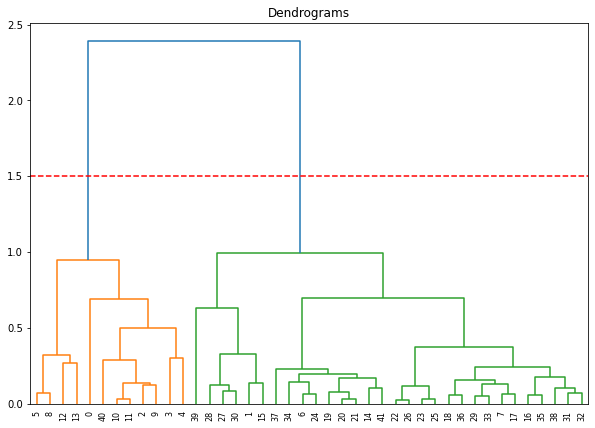

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram_2 = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

The x-axis contains the samples and y-axis represents the distance between these samples.
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1.5 and
cut the dendrogram.

We have two clusters as this line cuts the dendrogram at two points.
Let’s now apply hierarchical clustering for 2 clusters

In [42]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int32)

In [43]:
# Map crime names to their cluster.
crimes_names = data_df["ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"].tolist()
clusters = dict(zip(crimes_names, cluster.labels_))
pprint(clusters)


{'ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ': 1,
 'ΑΠΑΤΕΣ': 0,
 'ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ': 1,
 'ΒΙΑΣΜΟΙ': 1,
 'ΕΚΒΙΑΣΕΙΣ': 1,
 'ΕΠΑΙΤΕΙΑ': 1,
 'ΖΩΟΚΛΟΠΗ': 0,
 'ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ': 0,
 'Κλοπές - Διαρρήξεις από ιχε αυτ/τα': 0,
 'Κλοπές - Διαρρήξεις ιερών ναών': 0,
 'Κλοπές - Διαρρήξεις καταστημάτων': 0,
 'Κλοπές - Διαρρήξεις λοιπές': 0,
 'Κλοπές - Διαρρήξεις οικιών': 0,
 'Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα': 0,
 'Κλοπές Τροχοφόρων ΙΧΕ αυτ/των': 0,
 'Κλοπές Τροχοφόρων ΙΧΦ-Λεωφορείων': 0,
 'Κλοπές Τροχοφόρων Λοιπών οχημάτων': 0,
 'Κλοπές Τροχοφόρων Μοτοποδηλάτων': 0,
 'Κλοπές Τροχοφόρων Μοτοσυκλετών': 0,
 'Κλοπές με αρπαγές τσαντών': 0,
 'Κλοπές σε δημόσιο χώρο-μικροκλοπες': 0,
 'ΛΑΘΡΕΜΠΟΡΙΟ': 1,
 'Ληστείες εντός καταστημάτων': 0,
 'Ληστείες εντός οικιών': 0,
 'Ληστείες κινητών τηλεφώνων-μικροποσών': 0,
 'Ληστείες λοιπές': 0,
 'Ληστείες με αρπαγή τσάντας': 0,
 'Ληστείες οδηγών ταξί': 0,
 'Ληστείες πρατηρίων υγρών καυσίμων': 0,
 'Ληστείες σε ΕΛ.ΤΑ.': 0,
 'Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών': 0,
 'Ληστείες σ